# Neural Networks

## Predicting Chances of Admission at UCLA

### Project Scope:

The world is developing rapidly and continuously looking for the best knowledge and experience among people. This motivates people all around the world to stand out in their jobs and look for higher degrees that can help them in improving their skills and knowledge. As a result, the number of students applying for Master's programs has increased substantially.

The current admission dataset was created for the prediction of admissions into the University of California, Los Angeles (UCLA). It was built to help students in shortlisting universities based on their profiles. The predicted output gives them a fair idea about their chances of getting accepted.


**Your Role:**

Build a classification model using **Neural Networks** to predict a student's chance of admission into UCLA.


**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Admit_Chance 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 90% and above

### **Data Dictionary:**

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are : 

**GRE_Score:** (out of 340) \
**TOEFL_Score:** (out of 120) \
**University_Rating:**  It indicates the Bachelor University ranking (out of 5) \
**SOP:** Statement of Purpose Strength (out of 5) \
**LOR:** Letter of Recommendation Strength (out of 5) \
**CGPA:** Student's Undergraduate GPA(out of 10) \
**Research:** Whether the student has Research Experience (either 0 or 1) \
**Admit_Chance:** (ranging from 0 to 1) 

### **Loading the libraries and the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data using the pandas `read_csv()` function. 
data = pd.read_csv('Admission.csv')
data.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- In the above dataset, the target variable is **Admit_Chance**
- To make this a classification task, let's convert the target variable into a categorical variable by using a threshold of 80%
- We are assuming that if **Admit_Chance** is more than 80% then **Admit** would be 1 (i.e. yes) otherwise it would be 0 (i.e. no)

In [3]:
# Convert the target variable into a categorical variable. 
# With 80% and above as 1 or 0

data['Admit_Chance'] = (data["Admit_Chance"]>=0.8).astype(int)

In [4]:
data.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


#### Drop any unnecessary columns

In [5]:
# Dropping columns
data = data.drop('Serial_No', axis = 1)

Let's check the info of the data

In [6]:
# check the dtypes in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit_Chance       500 non-null    int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 29.4 KB


**Observations:**

- There are **500 observations and 8 columns** in the data
- All the columns are of **numeric data** type.
- There are **no missing values** in the data

Let's check the summary statistics of the data

In [7]:
# check quick stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
Admit_Chance,500.0,0.31000,0.462956,0.0,0.0000,0.00,1.00,1.00


**Observations:**

- The average GRE score of students applying for UCLA is ~316 out of 340. Some students scored full marks on GRE. 
-  The average TOEFL score of students applying for UCLA is ~107 out of 120. Some students scored full marks on TOEFL.
- There are students with all kinds of ratings for bachelor's University, SOP, and LOR - ratings ranging from 1 to 5.
-  The average CGPA of students applying for UCLA is 8.57.
- Majority of students (~56%) have research experience.
- As per our assumption, on average 31% of students would get admission to UCLA.

### **Let's visualize the dataset to see some patterns**

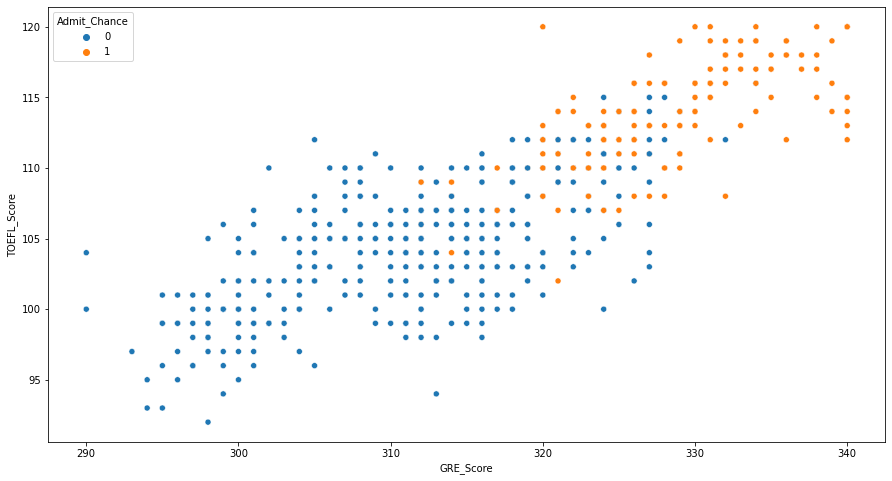

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, 
           x='GRE_Score', 
           y='TOEFL_Score', 
           hue='Admit_Chance');

**Observations:** 

- There is a linear relationship between GRE and TOEFL scores. This implies that students scoring high one of them would score high in the other as well.
- We can see a distinction between students who were admitted (denoted by orange) vs those who were not admitted (denoted by blue). We can see that majority of students who were admitted have GRE score greater than 320, TOEFL score greater than 105.

### **Data Preparation**

This dataset contains both numerical and categorical variables. We need to treat them first before we pass them onto the neural network. We will perform below pre-processing steps - 
*   One hot encoding of categorical variables

In this dataset, although the variable **University Rating** is encoded as a numerical variable. But it is denoting or signifying the quality of the university, so that is why this is a categorical variable and we would be creating one-hot encoding or dummy variables for this variable.

In [9]:
# Create dummy variables for 'Research'
data = pd.get_dummies(data, columns=['Research'], drop_first = True)

In [10]:
data.sample(5)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Admit_Chance,Research_1
105,316,110,3,4.0,4.5,8.78,0,1
94,303,99,3,2.0,2.5,7.66,0,0
221,316,110,3,3.5,4.0,8.56,0,0
474,308,105,4,3.0,2.5,7.95,0,1
376,297,96,2,2.5,2.0,7.43,0,0


### Split the Data into train and test

In [11]:
# import train test split module
from sklearn.model_selection import train_test_split

In [12]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Admit_Chance,Research_1
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,0,1
2,316,104,3,3.0,3.5,8.00,0,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [13]:
# split features and target
x = data.drop(['Admit_Chance'], axis = 1)
y = data['Admit_Chance']

In [14]:
# Splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=data['Admit_Chance'])

### Scale the Data

An important point to remember: Before we scale numerical variables, we would first split the dataset into train and test datasets and perform scaling separately. Otherwise, we would be leaking information from the test data to the train data and the resulting model might give a false sense of good performance. This is known as **data leakage** which we would want to avoid.

In [15]:
# import Min Max Scaler
from sklearn.preprocessing import MinMaxScaler


Now, we will perform scaling on the numerical variables separately for train and test sets. We will use `.fit` to calculate the mean and standard deviation and `.transform` to transform the data.

In [16]:
# fit calculates the mean and standard deviation
scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [17]:
# Now transform xtrain and xtest
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

## **Neural Network Architecture**

In neural networks, there are so many hyper-parameters that you can play around with and tune the network to get the best results. Some of them are - 



1.   Number of hidden layers
2.   Number of neurons in each hidden layer
3.   Activation functions in hidden layers
4.   Batch size
5.   Learning rate
6.   Dropout

In [18]:
# import the model from sklearn
from sklearn.neural_network import MLPClassifier

Let's build a feed forward neural network with 2 hidden layers.

### **Training the model**

In [19]:
# hidden layers, batch, epochs(max_iterations)
Model = MLPClassifier(hidden_layer_sizes=(6,4), max_iter=500) 

In [20]:
# fit/train the model
Model.fit(x_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(6, 4), max_iter=500)

In [21]:
# make Predictions
ypred = Model.predict(x_test_scaled)

In [22]:
# import evaluation metrices
from sklearn.metrics import accuracy_score

In [23]:
# check accuracy of the model
accuracy_score(ypred, y_test)

0.9

In [24]:
# testing on the training set
ypred = Model.predict(x_train_scaled)
accuracy_score(ypred, y_train)

0.93

### **Conclusion**

In this case study,

- We have learned how to build a neural network for a classification task. 
- We were able to get the test accuracy of 93% using the final model.
- You can further analyze the misclassified points and see if there is a pattern or if they were outliers that our model could not identify.